In [15]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#MEMBACA DATASET
df = pd.read_csv('dataset/botak.csv')
df.sample(5)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
4162,51.0,Laki-laki,Pegawai swasta,Pontianak,8.880068e+06,0,0.0,62.713766,164.260168,Deadbuoy,1,SMA,0.496877
2562,46.0,Laki-laki,Pegawai swasta,Pangkalpinang,5.879195e+06,0,1.0,52.315848,144.780557,Shoulder & Head,0,S2,0.592258
7786,32.0,Perempuan,PNS,Manado,7.199178e+06,0,0.0,66.329546,168.771247,Moonsilk,0,S1,0.225574
4937,19.0,Laki-laki,Pegawai swasta,Pontianak,6.903317e+06,0,0.0,55.923491,156.316625,Pantone,1,S1,0.332184
1379,50.0,Perempuan,PNS,Palangkaraya,2.260625e+07,0,0.0,56.017340,151.151298,Pantone,1,S1,0.419660


# Exploratory Data Analytics 

In [17]:
#MELIHAT RINGKASAN STATISTIK DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7991 non-null   float64
 1   jenis_kelamin  7982 non-null   object 
 2   pekerjaan      7924 non-null   object 
 3   provinsi       7991 non-null   object 
 4   gaji           7968 non-null   float64
 5   is_menikah     7991 non-null   int64  
 6   is_keturunan   7976 non-null   float64
 7   berat          7952 non-null   float64
 8   tinggi         7991 non-null   float64
 9   sampo          7934 non-null   object 
 10  is_merokok     7991 non-null   int64  
 11  pendidikan     7991 non-null   object 
 12  botak_prob     7991 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 811.7+ KB


In [18]:
#MELIHAT RINGKASAN STATISTIK TIAP KOLOM

#1. Mengelompokkan kolom berdasarkan jenisnya
nums = ['umur', 'gaji',  'is_menikah', 'is_keturunan',
        'berat', 'tinggi', 'is_merokok', 'botak_prob']
cats = ['jenis_kelamin', 'pekerjaan',
        'provinsi', 'sampo', 'pendidikan']

#2. Melihat ringkasan statistik kolom numerik
df[nums].describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
count,7991.000000,7.968000e+03,7991.000000,7976.000000,7952.000000,7991.000000,7991.000000,7991.000000
mean,39.604805,9.466150e+06,0.030284,0.193455,56.449251,157.547757,0.499312,0.395915
std,10.014420,4.809191e+06,0.171379,0.395032,9.581271,6.568111,0.500031,0.191092
min,3.000000,1.500000e+06,0.000000,0.000000,40.000000,136.197006,0.000000,-0.115700
25%,33.000000,6.109338e+06,0.000000,0.000000,49.919026,153.093636,0.000000,0.260501
50%,40.000000,8.412740e+06,0.000000,0.000000,54.237651,157.233899,0.000000,0.372669
75%,46.000000,1.153660e+07,0.000000,0.000000,60.770302,161.548151,1.000000,0.511974
max,78.000000,5.000000e+07,1.000000,1.000000,150.000000,200.225925,1.000000,1.000000


In [19]:
#melihat jumlah data yang memiliki nilai botal_prob negatif
df[df['botak_prob']<0].shape[0]

38

In [20]:
#3. Melihat ringkasan statistik kolom kategori
df[cats].describe()

,jenis_kelamin,pekerjaan,provinsi,sampo,pendidikan
count,7982,7924,7991,7934,7991
unique,2,4,34,5,6
top,Laki-laki,Pegawai swasta,Banda Lampung,Merpati,S1
freq,5342,3196,270,1652,4400


In [21]:
#menghitung jumlah anggota pada tiap kategori
print(df['jenis_kelamin'].value_counts(), '\n')

Laki-laki    5342
Perempuan    2640
Name: jenis_kelamin, dtype: int64 



In [22]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom jenis_kelamin:
Laki-laki    5342
Perempuan    2640
Name: jenis_kelamin, dtype: int64

Value count kolom pekerjaan:
Pegawai swasta    3196
PNS               3190
Freelance         1227
Pengangguran       311
Name: pekerjaan, dtype: int64

Value count kolom provinsi:
Banda Lampung     270
Serang            267
Denpasar          261
Pangkalpinang     258
Tanjungselor      257
Banda Aceh        257
Samarinda         256
Pekanbaru         255
Sofifi            252
Ambon             245
Manado            244
Mamuju            243
Mataram           240
Banjarmasin       239
Tanjung Pinang    238
Jakarta           236
Kupang            235
Pontianak         234
Semarang          234
Palembang         232
Bandung           230
Gorontalo         229
Jambi             229
Padang            227
Palangkaraya      226
Yogyakarta        226
Surabaya          222
Manokwari         220
Bengkulu          212
Kendari           211
Medan             207
Makassar          201
Palu        

ANALISIS PADA TIAP KOLOM
1. UNIVARIATE ANALYSIS : box plot, dist plot, dan count plot
2. MULTIVARIATE ANALYSIS : correlation heatmap danpair plot

<ipython-input-23-3c125be482d1>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-23-3c125be482d1>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-23-3c125be482d1>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-23-3c125be482d1>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-23-3c125be482d1>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-23-3c125be482d1>:6: UserWarning: Tight layout not applied. tight_layout cannot make a

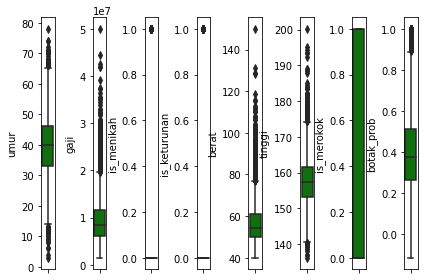

In [23]:
#BOX PLOTS
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

<ipython-input-24-2bbb5e05d680>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
<ipython-input-24-2bbb5e05d680>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
<ipython-input-24-2bbb5e05d680>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
<ipython-input-24-2bbb5e05d680>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
<ipython-input-24-2bbb5e05d680>:5: MatplotlibDeprecationWarning: Passing non

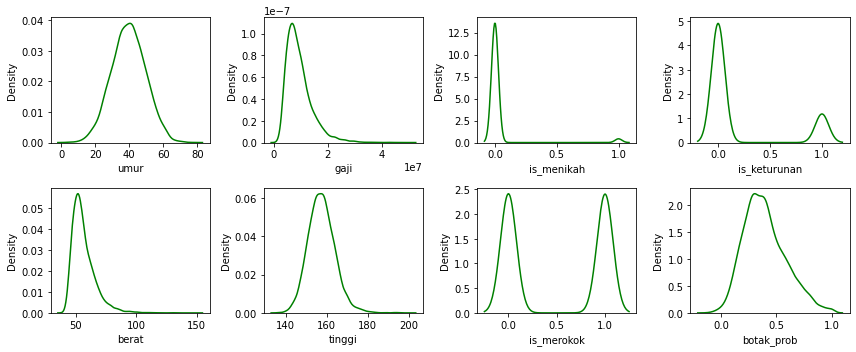

In [24]:
#DISTRIBUTION PLOTS
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

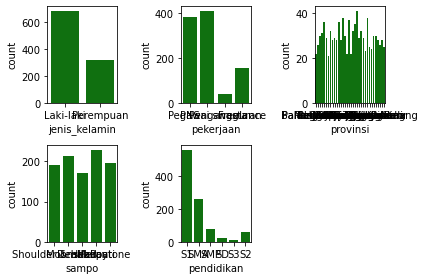

In [25]:
#COUNT PLOTS (DATA KATEGORIK)
df_sample = df.sample(1000, random_state=42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color='green', orient='v')
    plt.tight_layout()

<AxesSubplot:>

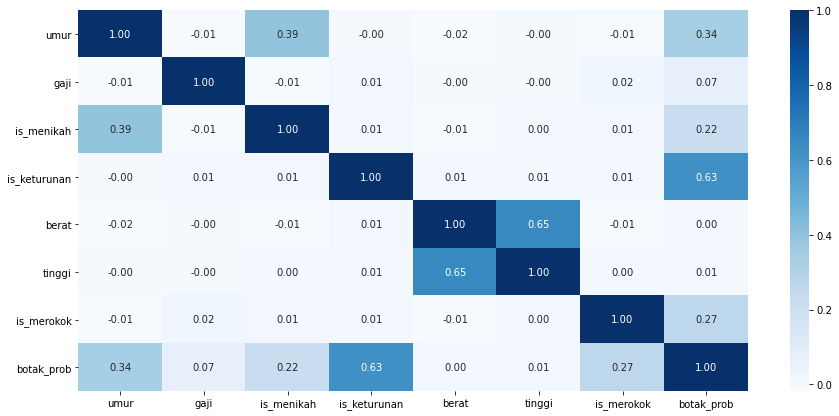

In [26]:
#CORRELATION HEATMAP
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

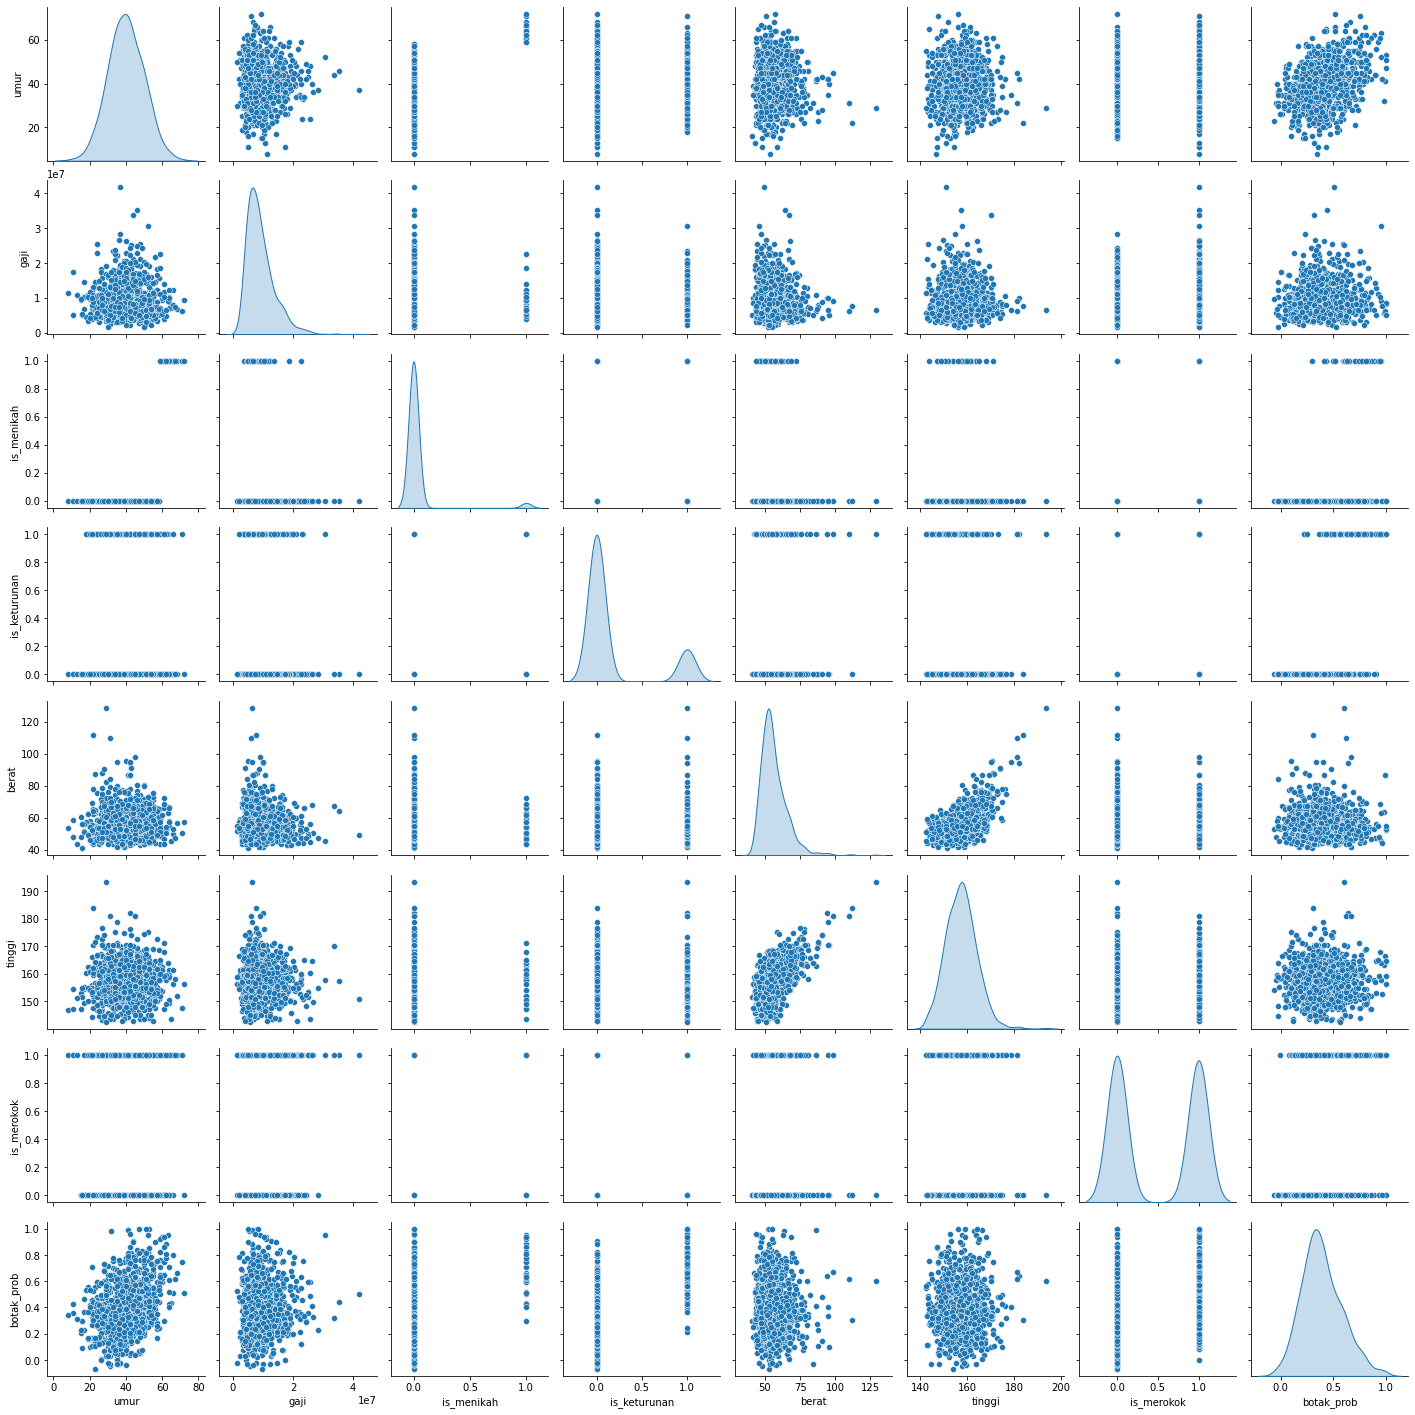

In [28]:
#PAIR PLOT
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde')

In [ ]:
#MEMBANDINGKAN KOLOM KATEGORIK DENGAN KOLOM TARGET
print(cats. '\n')

features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df_sample, x='botak_prob', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()